In [10]:
from Simulation import Simulation
from modules.Particle import Particle
from modules.Propagation import Propagation
from modules.Source import Source
import numpy as np

## Simulation of Random Walk Propagation

Initialize the simulation by calling Simulation(). The class instance simulation contains all information relevant for the complete simulation.

In [11]:
simulation = Simulation()

init simulation completed


### 1) Source of Particles

First, we have to define a source of particles that we want to propagate. 

##### Particle properties of source
The emitted particles need to have the following properties:

- **gyro radius**: $r_g = \frac{E}{c\cdot q \cdot \sqrt{b^2+B²}}$, with $E, c, q$ denoting, the particle's energy, the speed of light and the particle's charge, respectively. $b, B$ are the rms-values of the turbulence and background field, respectively. Only needed for determining the characteristic time-scale of the initial, ballistic phase of the perpendicular diffuion. 
- **diffusion tensor**: the diagonal elements of the diagonalized diffusion tensor are needed to determine the characteristics of the transport. Provide the quantity $\kappa = [\kappa_{xx}, \kappa_{yy}, \kappa_{zz}]$.

In [12]:
gyro_radius = 30.0
diffusion_tensor = np.array([1.0, 1.0, 100.0], dtype=np.float32)

##### Properties of source

The source of particles need the following properties:

- **source position**
- **number of particles**
- **particle properties**: gyro radius & diffusion tensor

Finally, only add the source to the simulation.

In [13]:
source_position = np.zeros(3, dtype=np.float32)
nr_particles = 500
source = Source(nr_particles, source_position, gyro_radius, diffusion_tensor)

### 2) Propagation Module

Add the propagation module that you want to use:

- **random walk**: Fast method that propagates individual particles along random walks. The overall behaviour is governed by a generalized telegraph equation: $\frac{\partial f}{\partial t} = \sum_i \tau_i \frac{\partial^2 f}{\partial t^2} = \sum_i \kappa_i \frac{\partial^2 f}{\partial x_i^2}$
- others coming soon...

In [14]:
step_size = 1.0
propagation = Propagation(step_size)
steps = 10**4
t_max = 10**4
time = np.linspace(1, t_max, steps, dtype=np.float32)

### -> Run Simulation

Add all moduels needed to the simulation and run it!

In [15]:
simulation.addParticles(source)
simulation.addPropagation(propagation, time)
kappas = simulation.runSimulation()

## Analizing Simulation Data

In [16]:
from modules.Observer import Plotter
import matplotlib.pyplot as plt

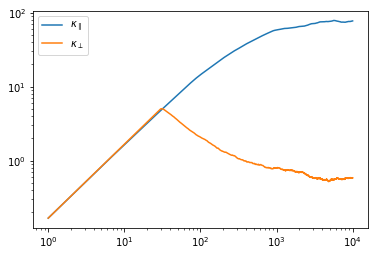

In [17]:
plt.plot(time, kappas[0], label='$\kappa_\parallel$')
plt.plot(time, kappas[1], label='$\kappa_\perp$')
plt.loglog()
plt.legend()
plt.show()

init plotter
start plotting


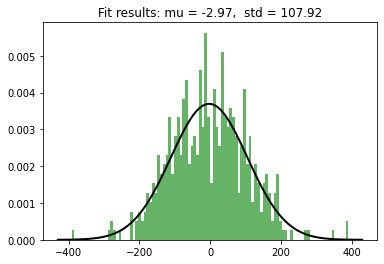

In [18]:
plotter = Plotter()
data = simulation.distribution(0)
plotter.distribution(data)